In [54]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

SME relevances

In [55]:
# out of sample
# SME_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.459, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.096, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.182, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -1.159, 'FC1(F)CC2CNCC(C1)C2(F)F': -4.224, 'FC1(F)C2CCCC1CNC2': -2.755, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.007, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -3.593, 'FC1CCNC1': -1.666, 'FC1(F)CCNC1': -3.437, 'F[C@@H]1CNC[C@@H]1F': -3.433, 'F[C@@H]1CNC[C@H]1F': -3.433, 'FC1CCCNC1': -1.545, 'FC1(F)CCCNC1': -3.086, 'F[C@@H]1CNC[C@H](F)C1': -3.956, 'F[C@@H]1CNC[C@@H](F)C1': -3.956, 'FC1CCNCC1': -0.582, 'F[C@@H]1CCNC[C@@H]1F': -3.328, 'F[C@@H]1CCNC[C@H]1F': -3.328, 'FC(F)C1CCCCN1': -2.47, 'FC(F)C1CCCN1': -2.48, 'FC(F)(F)C1CCN1': -2.83, 'FC(F)C1CCN1': -2.632, 'NCCF': -2.195, 'FC(F)(F)C1CCCNC1': -1.022, 'FC(F)C1CCCNC1': -0.589, 'FCC1CCCNC1': -0.13, 'FC(F)C1CCNC1': -0.728, 'FCC1CCNC1': -0.187, 'FC(F)(F)C1CNC1': -1.742, 'FC(F)C1CNC1': -0.926, 'FCC1CNC1': -0.409, 'NCCC(F)F': -1.369, 'NCCCF': -0.399, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.161, 'FCC1CCNCC1': -0.063, 'NCCCCF': -0.131, 'NCCCC(F)F': -0.676, 'NCCCC(F)(F)F': -0.94, 'CCCN': 0.0, 'CCC(F)(F)CN': -2.519, 'CC(F)(F)CCN': -0.939, 'FC(F)(F)C12CCC(CN1)C2': -4.531, 'FC(F)(F)C1CCCN1': -4.729, 'FC(F)(F)C1CCCCN1': -4.476, 'FC1(F)CCNCC1': -2.957, 'FC1(F)C2CCC1CNC2': -2.715, 'FC1CNC1': -3.413, 'FCC1CCCCN1': -0.768, 'FCC1CCCN1': -0.921, 'FCC1CCN1': -0.94, 'FC(F)(F)C1CCNCC1': -1.072, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}

# cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {}, 2: {}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

# overfit
# SME_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.553, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.241, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.46, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -1.301, 'FC1(F)CC2CNCC(C1)C2(F)F': -4.33, 'FC1(F)C2CCCC1CNC2': -2.931, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -2.35, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.757, 'FC1CCNC1': -2.433, 'FC1(F)CCNC1': -4.396, 'F[C@@H]1CNC[C@@H]1F': -4.182, 'F[C@@H]1CNC[C@H]1F': -4.182, 'FC1CCCNC1': -2.464, 'FC1(F)CCCNC1': -4.317, 'F[C@@H]1CNC[C@H](F)C1': -4.638, 'F[C@@H]1CNC[C@@H](F)C1': -4.638, 'FC1CCNCC1': -2.068, 'F[C@@H]1CCNC[C@@H]1F': -4.096, 'F[C@@H]1CCNC[C@H]1F': -4.096, 'FC(F)C1CCCCN1': -3.138, 'FC(F)C1CCCN1': -3.442, 'FC(F)(F)C1CCN1': -5.305, 'FC(F)C1CCN1': -3.407, 'NCCF': -1.925, 'FC(F)(F)C1CCCNC1': -2.143, 'FC(F)C1CCCNC1': -1.539, 'FCC1CCCNC1': -0.831, 'FC(F)C1CCNC1': -1.505, 'FCC1CCNC1': -0.828, 'FC(F)(F)C1CNC1': -2.565, 'FC(F)C1CNC1': -1.662, 'FCC1CNC1': -1.15, 'NCCC(F)F': -1.722, 'NCCCF': -0.696, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.929, 'FCC1CCNCC1': -0.663, 'NCCCCF': 0.306, 'NCCCC(F)F': -0.083, 'NCCCC(F)(F)F': -0.321, 'CCCN': 0.0, 'CCC(F)(F)CN': -2.912, 'CC(F)(F)CCN': -0.935, 'FC(F)(F)C12CCC(CN1)C2': -4.417, 'FC(F)(F)C1CCCN1': -5.172, 'FC(F)(F)C1CCCCN1': -4.788, 'FC1(F)CCNCC1': -3.349, 'FC1(F)C2CCC1CNC2': -3.021, 'FC1CNC1': -2.657, 'FCC1CCCCN1': -1.557, 'FCC1CCCN1': -1.709, 'FCC1CCN1': -1.553, 'FC(F)(F)C1CCNCC1': -1.535, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}

# separate model for each molecule
SME_fluorine = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}

cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

In [56]:
df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

gem_SME, CHF_single_SME, CHF_double_SME = [], [], []
gem, CHF_single, CHF_double = [], [], []

for index, row in df_main.iterrows():
    SMILES = row['Smiles']
    canon_SMILES = Chem.CanonSmiles(SMILES)
    if canon_SMILES not in train_SMILES and canon_SMILES not in test_SMILES:
        continue
    
    fluorine_group = row['F group']

    if "sec" not in row['identificator'].lower() or 's' in SMILES.lower():
        continue

    if fluorine_group not in ['CHF', 'gem-CF2']:
        continue
    
    if fluorine_group == 'gem-CF2':
        gem.append(row['pKa'])
        gem_SME.append(SME_fluorine[canon_SMILES])
    elif fluorine_group == 'CHF':
        if SMILES.lower().count('f') == 1:
            CHF_single.append(row['pKa'])
            CHF_single_SME.append(SME_fluorine[canon_SMILES])
        elif SMILES.lower().count('f') == 2:
            CHF_double.append(row['pKa'])
            CHF_double_SME.append(SME_fluorine[canon_SMILES])
    print(SMILES, row['F group'], row['pKa'])

FC1(F)CC2CNCC(C2)C1 gem-CF2 9.41
FC1(F)CC2CNCC(C1)C2(F)F gem-CF2 6.37
FC1(F)C2CCCC1CNC2 gem-CF2 7.72
FC1(F)C2CNCC1COC2 gem-CF2 8.05
FC1(F)C2CCC1CNC2 gem-CF2 7.69
FC1(F)CCNCC1 gem-CF2 7.75
FC1CNC1 CHF 8.55
FC1(F)CNC1 gem-CF2 6.44
FC1CCNC1 CHF 8.87
FC1(F)CCNC1 gem-CF2 6.88
F[C@@H]1CNC[C@@H]1F CHF 7.07
F[C@@H]1CNC[C@H]1F CHF 7.11
FC1CCCNC1 CHF 8.64
FC1(F)CCCNC1 gem-CF2 6.79
F[C@@H]1CNC[C@H](F)C1 CHF 6.74
F[C@@H]1CNC[C@@H](F)C1 CHF 6.22
FC1CCNCC1 CHF 9.05
F[C@@H]1CCNC[C@@H]1F CHF 7.01
F[C@@H]1CCNC[C@H]1F CHF 7.02


In [57]:
print(f"gem: {sum(gem) / len(gem)}, CHF single: {sum(CHF_single) / len(CHF_single)}, CHF double: {sum(CHF_double) / len(CHF_double)}")

gem: 7.455555555555557, CHF single: 8.7775, CHF double: 6.861666666666667


In [58]:
print(f"gem: {sum(gem_SME) / len(gem_SME)}, CHF single: {sum(CHF_single_SME) / len(CHF_single_SME)}, CHF double: {sum(CHF_double_SME) / len(CHF_double_SME)}")

gem: -2.8324444444444445, CHF single: -2.21975, CHF double: -3.8128333333333324


Text(0.5, 1.0, 'Basicity')

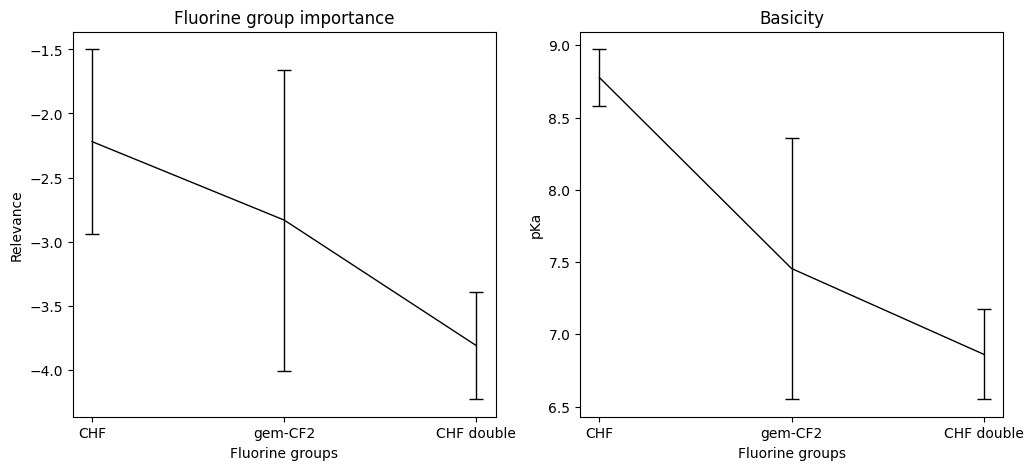

In [59]:
import matplotlib.pyplot as plt
import numpy as np

X = ['CHF', 'gem-CF2', 'CHF double']
Y_pka = [[CHF_single], [gem], [CHF_double]]
mean_Y_pka = [np.array(i).mean() for i in Y_pka]
std_deviation_Y_pka = [np.array(i).std() for i in Y_pka]

Y_sme = [[CHF_single_SME], [gem_SME], [CHF_double_SME]]
mean_Y_SME = [np.array(i).mean() for i in Y_sme]
std_deviation_Y_SME = [np.array(i).std() for i in Y_sme]

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(X, mean_Y_SME, linestyle='-', color="black", label=X, linewidth=1)
for i in range(len(X)):
    ax1.errorbar(X[i], mean_Y_SME[i], yerr=std_deviation_Y_SME[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
ax1.set_xlabel("Fluorine groups")
ax1.set_ylabel("Relevance")
ax1.set_title("Fluorine group importance")

ax2.plot(X, mean_Y_pka, linestyle='-', color="black", label=X, linewidth=1)
for i in range(len(X)):
    ax2.errorbar(X[i], mean_Y_pka[i], yerr=std_deviation_Y_pka[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
ax2.set_xlabel("Fluorine groups")
ax2.set_ylabel("pKa")
ax2.set_title("Basicity")

---------

---------

---------

---------

---------

SME per class

In [60]:
for SMILES, fluorine_group in SMILES_to_fgroup.items():
    if fluorine_group == 'CHF':
        if SMILES.lower().count('f') == 1:
            SMILES_to_fgroup[SMILES] = 'CHF'
        elif SMILES.lower().count('f') == 2:
            SMILES_to_fgroup[SMILES] = 'CHF-double'

In [61]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "CHF-double": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [62]:
functional_group_to_smiles

{'CF3': 'CC(F)(F)F',
 'CH2F': 'CCF',
 'gem-CF2': 'CF',
 'CHF2': 'CC(F)(F)',
 'CHF': 'CF',
 'CHF-double': 'CF',
 'non-F': ''}

In [63]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in SME_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

O=C(O)C1CCC(F)(F)CC1 ((6, 7), (6, 8)) gem-CF2 5
O=C(O)C1CCCCC1 () non-F inf
O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 6
O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 6
O=C(O)C1CCC1 () non-F inf
O=C(O)C1(CF)CCC1 ((3, 4, 5),) CH2F 2
O=C(O)C1(C(F)F)CCC1 ((3, 4, 5, 6),) CHF2 2
O=C(O)C1(C(F)(F)F)CCC1 ((3, 4, 5, 6, 7),) CF3 2
O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 4
O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 4
O=C(O)[C@H]1C[C@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 4
O=C(O)[C@H]1C[C@@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 4
O=C(O)[C@H]1C[C@H](CF)C1 ((5, 6, 7),) CH2F 4
O=C(O)[C@H]1C[C@@H](CF)C1 ((5, 6, 7),) CH2F 4
O=C(O)C1CC1(F)F ((5, 6), (5, 7)) gem-CF2 4
O=C(O)C1CCC1(F)F ((6, 7), (6, 8)) gem-CF2 3
O=C(O)C1CC(F)(F)C1 ((5, 6), (5, 7)) gem-CF2 4
O=C(O)C1CCCC1(F)F ((7, 8), (7, 9)) gem-CF2 3
O=C(O)C1CCC(F)(F)C1 ((6, 7), (6, 8)) gem-CF2 5
O=C(O)C1CCCCC1(F)F ((8, 9), (8, 10)) gem-CF2 3
O=C(O)C1CCCCCC1(F)

In [64]:
# SMILES_to_pKa_oos = {'FC(F)(F)C12CCC(CN1)C2': (6.23, 6.277562618255615), 'FC(F)(F)C1CCCN1': (6.06, 6.323980808258057), 'FC(F)(F)C1CCCCN1': (6.41, 6.40265417098999), 'NC1CC12CC2(F)F': (7.44, 7.330677509307861), 'NC1CCCC1(F)F': (7.54, 7.531748294830322), 'FC1(F)CCNCC1': (7.75, 7.9213643074035645), 'FC1(F)C2CCC1CNC2': (7.69, 7.873813629150391), 'NC1CCC(F)(F)C1': (8.83, 8.720830917358398), 'FC1CNC1': (8.55, 7.4924211502075195), 'N[C@@H]1CC[C@H]1C(F)F': (8.98, 8.455097198486328), 'C[C@@H]1C[C@@H]1N': (9.15, 9.269006729125977), 'FCC1CCCCN1': (9.52, 10.110053062438965), 'FCC1CCCN1': (9.55, 10.132061004638672), 'FCC1CCN1': (9.67, 9.964872360229492), 'NC1CC2(C1)CC(F)C2': (9.81, 10.058855056762695), 'FC(F)(F)C1CCNCC1': (9.6, 9.806882858276367), 'CCCCN': (10.5, 10.548676490783691), 'CC12CCC(CC1)CN2': (11.27, 10.78183364868164), 'CC12CCCC(CN1)C2': (10.99, 10.803987503051758)}
# SMILES_to_pKa_cv_1 = {'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': (8.89, 8.376729011535645), 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': (8.95, 8.376729011535645), 'N[C@@H]1C[C@@H]2C[C@@H]2C1': (9.79, 9.792981147766113), 'FC(F)(F)C12CC(CN1)C2': (6.52, 5.929771423339844), 'C1NC2CC1C2': (11.23, 10.38867473602295), 'C1CCNC1': (11.27, 10.500483512878418), 'CC12CC(CN1)C2': (11.28, 8.289649963378906), 'C1CC2CCC1CN2': (10.89, 10.469767570495605), 'C1CCNCC1': (11.12, 10.524636268615723), 'FC1(F)C2CCCC1CNC2': (7.72, 7.928922176361084), 'FC1(F)C2CNCC1COC2': (8.05, 7.451582908630371), 'C1CNC1': (11.21, 10.47805404663086), 'FC1(F)CNC1': (6.44, 6.884603023529053), 'FC1(F)CCNC1': (6.88, 7.063803672790527), 'FC1CCCNC1': (8.64, 8.97996997833252), 'FC1(F)CCCNC1': (6.79, 7.439105987548828), 'FC1CCNCC1': (9.05, 9.942830085754395), 'F[C@@H]1CCNC[C@H]1F': (7.02, 7.196150779724121), 'NC1(C(F)(F)F)CCC1': (5.0, 6.776170253753662), 'NC1(C(F)F)CCC1': (6.62, 7.145322322845459), 'NC1(CF)CCC1': (8.1, 7.972487449645996), 'NC1CCC1': (9.86, 10.409819602966309), 'N[C@H]1C[C@H](C(F)(F)F)C1': (8.74, 8.76187515258789), 'N[C@H]1C[C@@H](C(F)F)C1': (9.04, 9.211363792419434), 'N[C@H]1C[C@H](CF)C1': (9.58, 9.494974136352539), 'N[C@H]1C[C@@H](CF)C1': (9.48, 9.494974136352539), 'FC(F)C1CCCN1': (7.78, 8.02009391784668), 'FC(F)(F)C1CCN1': (5.84, 7.6481757164001465), 'FC(F)C1CCN1': (7.83, 7.845765113830566), 'FC(F)(F)C1CCCNC1': (9.01, 9.502872467041016), 'FCC1CNC1': (10.05, 10.068970680236816), 'CCN': (10.75, 10.470850944519043), 'FC(F)C1CCNCC1': (10.19, 10.363476753234863), 'NCCCCF': (10.36, 9.941690444946289), 'NCCCC(F)F': (10.02, 9.396272659301758), 'NCCCC(F)(F)F': (9.74, 9.13269329071045), 'NC1CCCCC1(F)F': (7.45, 8.110057830810547), 'NC1CCCC(F)(F)C1': (9.12, 9.33713436126709), 'NC1CCCC(F)(F)CC1': (9.57, 9.420806884765625), 'CC(F)(F)CCN': (9.57, 9.204269409179688), 'NC1CC2(CCC2)C1': (10.21, 10.576300621032715), 'NC1CC2(C1)CC(F)(F)C2': (9.58, 9.723896980285645), 'N[C@@H]1CC[C@H]1CF': (9.32, 8.732662200927734), 'N[C@@H]1C[C@H]1C(F)(F)F': (7.18, 7.07839298248291), 'N[C@H]1C[C@H]1C(F)F': (7.16, 7.800370216369629)}
# SMILES_to_pKa_cv_0 = {'NC1CCC(F)(F)CC1': (9.45, 9.141904830932617), 'NC1CCCCC1': (10.58, 10.189303398132324), 'N[C@H]1C[C@@H]2C[C@@H]2C1': (9.77, 9.917840003967285), 'FC(F)(F)C12CCC(CC1)CN2': (6.56, 6.489315986633301), 'C1CC2CC1CN2': (10.42, 11.10752010345459), 'FC(F)(F)C12CCCC(CN1)C2': (5.96, 6.516655921936035), 'C1CC2CNC(C1)C2': (10.38, 11.12277603149414), 'FC1(F)CC2CNCC(C2)C1': (9.41, 10.548171043395996), 'FC1(F)CC2CNCC(C1)C2(F)F': (6.37, 7.841762542724609), 'C1CC2CNCC(C1)C2': (10.86, 10.750115394592285), 'C1NCC2COCC1C2': (10.4, 10.63902759552002), 'C1CC2CNCC1C2': (10.53, 10.74399471282959), 'FC1CCNC1': (8.87, 7.829167366027832), 'F[C@@H]1CNC[C@@H]1F': (7.07, 6.8240647315979), 'F[C@@H]1CNC[C@H]1F': (7.11, 6.8240647315979), 'F[C@@H]1CNC[C@H](F)C1': (6.74, 7.393925666809082), 'F[C@@H]1CNC[C@@H](F)C1': (6.22, 7.393925666809082), 'F[C@@H]1CCNC[C@@H]1F': (7.01, 7.050014495849609), 'N[C@H]1C[C@@H](C(F)(F)F)C1': (8.6, 8.913224220275879), 'N[C@H]1C[C@H](C(F)F)C1': (9.17, 9.075196266174316), 'FC(F)C1CCCCN1': (7.99, 7.922918796539307), 'NCCF': (8.96, 9.395058631896973), 'FC(F)C1CCCNC1': (9.55, 9.733355522155762), 'FCC1CCCNC1': (10.32, 10.670539855957031), 'FC(F)C1CCNC1': (9.75, 9.490859031677246), 'FCC1CCNC1': (10.38, 10.433175086975098), 'FC(F)(F)C1CNC1': (8.67, 7.971950054168701), 'FC(F)C1CNC1': (9.57, 8.433732986450195), 'NCCC(F)F': (9.02, 9.278724670410156), 'NCCCF': (10.05, 10.023528099060059), 'FCC1CCNCC1': (10.46, 10.687161445617676), 'CCCN': (10.03, 10.623517990112305), 'NC1CCC1(F)F': (7.2, 7.214275360107422), 'NC1CC(F)(F)C1': (8.37, 8.352636337280273), 'NC1CCCCCC1(F)F': (8.13, 7.413575172424316), 'NC1CCCCC(F)(F)C1': (9.35, 9.182284355163574), 'CCC(F)(F)CN': (7.59, 7.021653175354004), 'NC1CC1': (8.76, 9.471421241760254), 'NC1CCCC1': (10.52, 10.187321662902832), 'NC1CCCCCC1': (10.69, 10.189303398132324), 'N[C@@H]1CC[C@H]1C(F)(F)F': (7.95, 7.915755748748779), 'N[C@H]1C[C@H]1C(F)(F)F': (6.92, 7.170922756195068), 'N[C@@H]1C[C@H]1C(F)F': (7.76, 7.3624372482299805), 'C[C@@H]1C[C@H]1N': (9.44, 9.380206108093262), 'NC1CC12CC2': (9.41, 9.009699821472168)}

# SMILES_to_pKa = SMILES_to_pKa_oos.copy()
# SMILES_to_pKa.update(SMILES_to_pKa_cv_1)
# SMILES_to_pKa.update(SMILES_to_pKa_cv_0)

In [65]:
# SMILES_to_pKa_ = {}
# for smiles, pkas in SMILES_to_pKa.items():
#     SMILES_to_pKa_[Chem.CanonSmiles(smiles)] = pkas

# SMILES_to_pKa = SMILES_to_pKa_.copy()

In [66]:
# SMILES_to_pKa['O=C(O)C1CCC(F)(F)CC1']

SMILES_to_pKa

{'O=C(O)C1CCC(F)(F)CC1': 4.32,
 'O=C(O)C1CCCCC1': 4.85,
 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 4.35,
 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 4.24,
 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 3.8,
 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 3.76,
 'O=C(O)C1CCC1': 4.5,
 'O=C(O)C1(CF)CCC1': 3.66,
 'O=C(O)C1(C(F)F)CCC1': 3.08,
 'O=C(O)C1(C(F)(F)F)CCC1': 2.9,
 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': 3.83,
 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': 3.88,
 'O=C(O)[C@H]1C[C@H](C(F)F)C1': 4.11,
 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': 3.92,
 'O=C(O)[C@H]1C[C@H](CF)C1': 4.18,
 'O=C(O)[C@H]1C[C@@H](CF)C1': 4.12,
 'O=C(O)C1CC1(F)F': 3.25,
 'O=C(O)C1CCC1(F)F': 3.62,
 'O=C(O)C1CC(F)(F)C1': 4.02,
 'O=C(O)C1CCCC1(F)F': 3.76,
 'O=C(O)C1CCC(F)(F)C1': 3.98,
 'O=C(O)C1CCCCC1(F)F': 3.81,
 'O=C(O)C1CCCC(F)(F)C1': 4.18,
 'O=C(O)C1CCCCCC1(F)F': 3.78,
 'O=C(O)C1CCCCC(F)(F)C1': 4.09,
 'O=C(O)C1CCCC(F)(F)CC1': 4.36,
 'CCC(F)(F)CC(=O)O': 3.55,
 'CC(F)(F)CCC(=O)O': 4.17,
 'O=C(O)CCCC(F)F': 4.38,
 'O=C(O)C1CC1': 4.6,
 'O=C(O)C1CCCC1': 4.69,
 'O=C(O)C

cyclobutane CH2F O=C(O)C1(CF)CCC1 3.66 -0.848 Outlier 
cyclobutane CHF2 O=C(O)C1(C(F)F)CCC1 3.08 -0.902 Outlier 
cyclobutane CF3 O=C(O)C1(C(F)(F)F)CCC1 2.9 -1.372 Outlier 
cyclobutane gem-CF2 FC1(F)CNC1 6.44 -4.695 Used for train 0
cyclopentane CHF FC1CCNC1 8.87 -2.517 Used for train 1
cyclopentane gem-CF2 FC1(F)CCNC1 6.88 -3.875 Used for train 0
cyclopentane CHF-double F[C@@H]1CNC[C@@H]1F 7.07 -4.274 Used for train 1
cyclopentane CHF-double F[C@@H]1CNC[C@H]1F 7.11 -4.379 Used for train 1
cyclohexane CHF FC1CCCNC1 8.64 -1.699 Used for train 0
cyclohexane gem-CF2 FC1(F)CCCNC1 6.79 -2.897 Used for train 0
cyclohexane CHF-double F[C@@H]1CNC[C@H](F)C1 6.74 -3.976 Used for train 1
cyclohexane CHF-double F[C@@H]1CNC[C@@H](F)C1 6.22 -3.324 Used for train 1
cyclohexane CHF-double F[C@@H]1CCNC[C@@H]1F 7.01 -3.419 Used for train 1
cyclohexane CHF-double F[C@@H]1CCNC[C@H]1F 7.02 -3.505 Used for train 0
cyclohexane CF3 FC(F)(F)C1CCCNC1 9.01 -1.296 Used for train 0
cyclohexane CHF2 FC(F)C1CCCNC1 9.

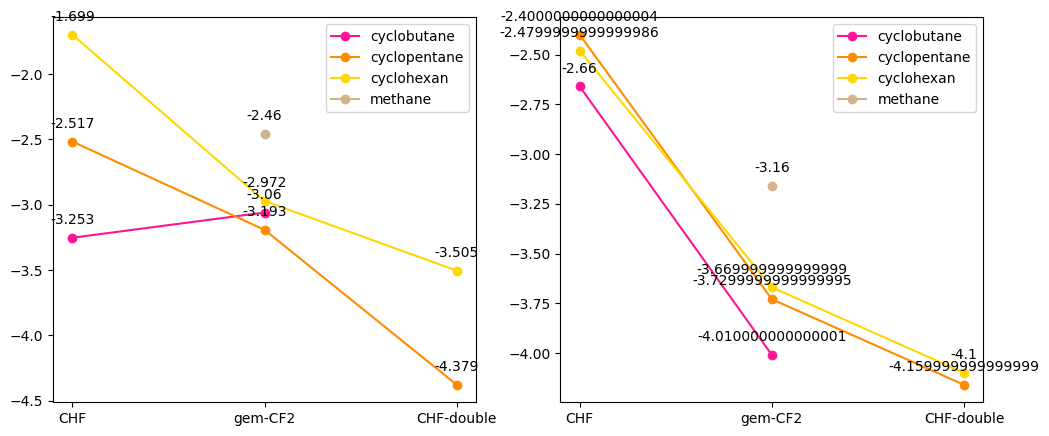

cyclobutane gem-CF2 O=C(O)C1CCC1(F)F 3.62 -0.962 Outlier 
cyclopentane gem-CF2 O=C(O)C1CCCC1(F)F 3.76 -0.865 Outlier 
cyclohexane gem-CF2 O=C(O)C1CCCCC1(F)F 3.81 -0.854 Outlier 
methane gem-CF2 CCC(F)(F)CC(=O)O 3.55 -0.957 Outlier 
cyclobutane CF3 O=C(O)[C@@H]1CC[C@H]1C(F)(F)F 3.87 -0.319 Outlier 
cyclobutane CHF2 O=C(O)[C@@H]1CC[C@H]1C(F)F 4.26 -0.321 Outlier 
cyclobutane CH2F O=C(O)[C@@H]1CC[C@H]1CF 4.38 -0.182 Outlier 
cyclohexane CHF FC1CCNCC1 9.05 -1.41 Used for train 0
cyclobutane CF3 N[C@H]1C[C@H](C(F)(F)F)C1 8.74 -1.22 Used for train 0
cyclobutane CF3 N[C@H]1C[C@@H](C(F)(F)F)C1 8.6 -1.179 Used for train 1
cyclobutane CHF2 N[C@H]1C[C@H](C(F)F)C1 9.17 -1.106 Used for train 1
cyclobutane CHF2 N[C@H]1C[C@@H](C(F)F)C1 9.04 -1.03 Used for train 0
cyclobutane CH2F N[C@H]1C[C@H](CF)C1 9.58 -0.812 Used for train 0
cyclobutane CH2F N[C@H]1C[C@@H](CF)C1 9.48 -0.698 Used for train 0
cyclohexane CHF2 FC(F)C1CCNCC1 10.19 -0.389 Used for train 0
cyclohexane CH2F FCC1CCNCC1 10.46 -0.073 Used f

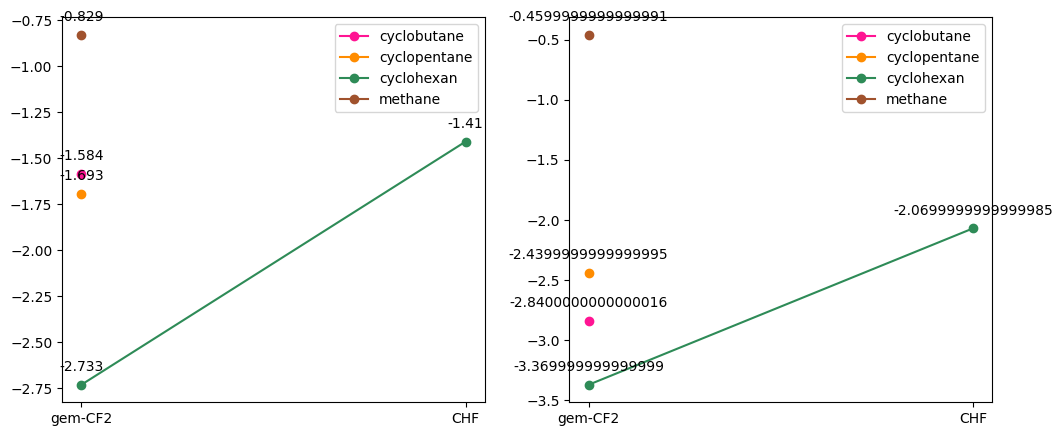

In [69]:
import matplotlib.pyplot as plt

cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclobutane_logP = {1: {'H': [11.21]}, 2: {'H': [11.21]}, 3: {'H': [11.21]}}
cyclopentane_logP = {1: {'H': [11.27]}, 2: {'H': [11.27], 'CF3': [8.97]}, 3: {'H': [11.27]}}
cyclohexan_logP = {1: {'H': [11.12]}, 2: {'H': [11.12]}, 3: {'H': [11.12]}}
methane_logP = {1: {'H': [10.78]}, 2: {'H': [10.75]}, 3: {'H': [10.03]}}

for distance_global in range(2, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['CH2F', 'CHF2', 'CF3']
    X_optimal = ['CHF', 'gem-CF2', 'CHF-double']
    # X_optimal = ['CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        smiles_type = "Outlier"
        fold_id = ""
        if SMILES in train_smiles:
            smiles_type = "Used for train"
            fold_id = f"{smiles_to_fold[SMILES]}"
        if SMILES in test_smiles:
            smiles_type = "Used for test"
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES] - cyclohexan_logP[distance_global]['H'][0])
            else:
                cyclohexan[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES] - cyclohexan_logP[distance_global]['H'][0]]
            print("cyclohexane", f_group, SMILES, logP_value, SME_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES] - cyclopentane_logP[distance_global]['H'][0])
            else:
                cyclopentane[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES] - cyclopentane_logP[distance_global]['H'][0]]
            print("cyclopentane", f_group, SMILES, logP_value, SME_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES] - cyclobutane_logP[distance_global]['H'][0])
            else:
                cyclobutane[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES] - cyclobutane_logP[distance_global]['H'][0]]
            print("cyclobutane", f_group, SMILES, logP_value, SME_fluorine[SMILES], smiles_type, fold_id)
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(SME_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES] - methane_logP[distance_global]['H'][0])
            else:
                methane[distance_global][f_group] = [SME_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES] - methane_logP[distance_global]['H'][0]]
            print("methane", f_group, SMILES, logP_value, SME_fluorine[SMILES], smiles_type, fold_id)

    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP),
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    
